In [1]:
import numpy as np
import pandas as pd

In [2]:
MusicRatingsTrain = pd.read_csv("MusicRatingsTrain.csv", index_col = 0)
MusicRatingsValidationA = pd.read_csv("MusicRatingsValidationA.csv", index_col = 0)
MusicRatingsValidationB = pd.read_csv("MusicRatingsValidationB.csv", index_col = 0)
MusicRatingsTest = pd.read_csv("MusicRatingsTest.csv", index_col = 0)

In [3]:
MusicRatingsTest

,songID,rating,songName,year,artist,genre
userID,,,,,,
501,736,1.000000,I Gotta Feeling,2009,Black Eyed Peas,Pop
1162,753,1.494918,Bitter Sweet Symphony,1997,The Verve,Pop
898,5,1.000000,Full Circle,2008,Miley Cyrus,Pop
472,752,1.784426,The Fear,2008,Lily Allen,Pop
1307,630,1.000000,Marry Me,2009,Train,Pop
...,...,...,...,...,...,...
53,773,1.494918,Let's Dance,2007,Miley Cyrus,Pop
2218,424,1.494918,Colourful,2006,Skream,Electronic
782,91,1.000000,Let's Take A Ride,2002,Justin Timberlake,Pop


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

MusicRatingsTrain_dummy = pd.get_dummies(MusicRatingsTrain['genre'])
MusicRatingsValidationA_dummy = pd.get_dummies(MusicRatingsValidationA['genre'])
MusicRatingsValidationB_dummy = pd.get_dummies(MusicRatingsValidationB['genre'])
MusicRatingsTest_dummy = pd.get_dummies(MusicRatingsTest['genre'])
# #Combine the train_DTM and test_DTM together, using inner join to exclude features that only appear in one DTM.
# dtm = pd.concat([MusicRatingsTrain_dummy, MusicRatingsValidationA_dummy, MusicRatingsValidationB_dummy, MusicRatingsTest_dummy], join = 'inner')
# #Separate the new train_DTM and test_DTM from the combined DTM.
# MusicRatingsTrain_new = dtm.iloc[0:MusicRatingsTrain_dummy.shape[0]]
# MusicRatingsValidationA_new = dtm.iloc[MusicRatingsTrain_dummy.shape[0]+1:MusicRatingsTrain_dummy.shape[0]+MusicRatingsValidationA_dummy.shape[0]]
# MusicRatingsValidationB_new = dtm.iloc[MusicRatingsTrain_dummy.shape[0]+MusicRatingsValidationA_dummy.shape[0]+1:MusicRatingsTrain_dummy.shape[0]+MusicRatingsValidationA_dummy.shape[0]+MusicRatingsValidationB_dummy.shape[0]]
# MusicRatingsTest_new = dtm.iloc[MusicRatingsTest_dummy.shape[0]:]

In [5]:
MusicRatingsValidationA_dummy

,Country,Electronic,Folk,Pop,Rap,RnB,Rock
userID,,,,,,,
1121,0,1,0,0,0,0,0
1276,0,0,0,1,0,0,0
114,1,0,0,0,0,0,0
1681,0,0,0,0,0,0,1
2001,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1125,0,0,0,0,0,0,1
1448,0,1,0,0,0,0,0
1020,0,0,0,0,0,0,1


In [6]:
MusicRatingsTrain = MusicRatingsTrain_dummy.join(MusicRatingsTrain[['songID','rating','songName','year','artist']], on=['userID'])
# MusicRatingsValidationA = pd.concat([MusicRatingsValidationA_dummy, MusicRatingsValidationA[['songID','rating','songName','year','artist']]])
# MusicRatingsValidationB = pd.concat([MusicRatingsValidationB_dummy, MusicRatingsValidationB[['songID','rating','songName','year','artist']]])
# MusicRatingsTest = pd.concat([MusicRatingsTest_dummy, MusicRatingsTest[['songID','rating','songName','year','artist']]])
# MusicRatingsTrain = MusicRatingsTrain_dummy.join(MusicRatingsTrain[['songID','rating','songName','year','artist']])
MusicRatingsTrain

,Country,Electronic,Folk,Pop,Rap,RnB,Rock,songID,rating,songName,year,artist
userID,,,,,,,,,,,,
778,0,0,0,0,0,0,1,242,1.494918,Billy Liar,2003,The Decemberists
778,0,0,0,0,0,0,1,469,1.000000,Brandenburg,2006,Beirut
778,0,0,0,0,0,0,1,453,1.000000,Sam's Town,2006,The Killers
778,0,0,0,0,0,0,1,329,1.000000,The Greys,2006,Frightened Rabbit
778,0,0,0,0,0,0,1,680,2.149164,Ray Gun,2009,the bird and the bee
...,...,...,...,...,...,...,...,...,...,...,...,...
721,0,0,0,1,0,0,0,345,1.000000,Everywhere I Go,2008,Hollywood Undead
721,0,0,0,1,0,0,0,692,1.000000,Drops Of Jupiter,2001,Train
721,0,0,0,1,0,0,0,332,1.000000,How You Remind Me,2000,Nickelback


In [7]:
MusicRatingsValidationA = MusicRatingsValidationA_dummy.join(MusicRatingsValidationA[['songID','rating','songName','year','artist']], on=['userID'])

In [8]:
MusicRatingsValidationB = MusicRatingsValidationB_dummy.join(MusicRatingsValidationB[['songID','rating','songName','year','artist']], on=['userID'])

In [9]:
MusicRatingsTest = MusicRatingsTest_dummy.join(MusicRatingsTest[['songID','rating','songName','year','artist']], on=['userID'])

In [10]:
MusicRatingsTest

,Country,Electronic,Folk,Pop,Rap,RnB,Rock,songID,rating,songName,year,artist
userID,,,,,,,,,,,,
501,0,0,0,1,0,0,0,736,1.000000,I Gotta Feeling,2009,Black Eyed Peas
501,0,0,0,1,0,0,0,9,1.989836,I'm Still Breathing,2008,Katy Perry
501,0,0,0,1,0,0,0,398,1.494918,Dirty Little Secret,2005,The All-American Rejects
501,0,0,0,1,0,0,0,48,1.784426,Night Drive (Acoustic),2005,All American Rejects
501,0,0,0,1,0,0,0,726,1.494918,Bye Bye,2008,Mariah Carey
...,...,...,...,...,...,...,...,...,...,...,...,...
12,0,0,0,1,0,0,0,260,1.000000,Te Amo,2009,Rihanna
12,0,0,0,1,0,0,0,512,2.644082,Shake A Tail Feather,2005,The Cheetah Girls
12,0,0,0,1,0,0,0,146,2.279344,LDN (Switch Remix),2009,Lily Allen


In [78]:
MusicRatingsTrain_new.sort_index()
MusicRatingsTrain_new_df = MusicRatingsTrain_new.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
MusicRatingsTrain_new_df.info()

KeyError: 'rating'

In [29]:
# Compute the summary statistics for the rating variable
mean_rating = MusicRatingsTrain_new["rating"].mean()
median_rating = MusicRatingsTrain_new["rating"].median()
std_rating = MusicRatingsTrain_new["rating"].std()
min_rating = MusicRatingsTrain_new["rating"].min()
max_rating = MusicRatingsTrain_new["rating"].max()

# Print the results
print("Mean rating: ", mean_rating)
print("Median rating: ", median_rating)
print("Standard deviation of rating: ", std_rating)
print("Minimum rating: ", min_rating)
print("Maximum rating: ", max_rating)

Mean rating:  1.3226311843072156
Median rating:  1.0
Standard deviation of rating:  0.46088622855102235
Minimum rating:  1.0
Maximum rating:  4.768655987487031


In [30]:
MusicRatingsValidationA_new.sort_index()
MusicRatingsValidationA_new_df = MusicRatingsValidationA_new.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
#movie_lens_valA_df.info()
valA_extra_columns = list(set(range(1,807+1)) - set(MusicRatingsValidationA_new_df.columns))
# print('# of missing columns: %s; # of missing musics: %s' % (2421-MusicRatingsValidationA_df.shape[1], len(valA_extra_columns)))
MusicRatingsValidationA_new_df[valA_extra_columns]=np.nan
MusicRatingsValidationA_new_df=MusicRatingsValidationA_new_df[MusicRatingsTrain_new_df.columns]
MusicRatingsValidationA_new_df = MusicRatingsTrain_new_df[[]].join(MusicRatingsValidationA_new_df, how='outer')
print(MusicRatingsValidationA_new_df.shape)

(2421, 807)


In [31]:
MusicRatingsValidationB_new.sort_index()
MusicRatingsValidationB_new_df = MusicRatingsValidationB_new.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
valB_extra_columns = list(set(range(1,807+1)) - set(MusicRatingsValidationB_new_df.columns))
MusicRatingsValidationB_new_df[valB_extra_columns]=np.nan
MusicRatingsValidationB_new_df = MusicRatingsValidationB_new_df[MusicRatingsTrain_new_df.columns]
MusicRatingsValidationB_new_df = MusicRatingsTrain_new_df[[]].join(MusicRatingsValidationB_new_df, how='outer')
print(MusicRatingsValidationB_new_df.shape)

(2421, 807)


In [32]:
MusicRatingsTest_new.sort_index()
MusicRatingsTest_new_df = MusicRatingsTest_new.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
test_extra_columns = list(set(range(1,3706+1)) - set(MusicRatingsTest_new_df.columns))
MusicRatingsTest_new_df[test_extra_columns]=np.nan
MusicRatingsTest_new_df = MusicRatingsTest_new_df[MusicRatingsTrain_new_df.columns]
MusicRatingsTest_new_df = MusicRatingsTrain_new_df[[]].join(MusicRatingsTest_new_df, how='outer')
print(MusicRatingsTest_new_df.shape)

(2421, 807)


In [33]:
MusicRatingsTrain_new_mat = MusicRatingsTrain_new_df.to_numpy()
MusicRatingsValidationA_new_mat = MusicRatingsValidationA_new_df.to_numpy()
MusicRatingsValidationB_new_mat = MusicRatingsValidationB_new_df.to_numpy()
MusicRatingsTest_new_mat = MusicRatingsTest_new_df.to_numpy()

In [34]:
MusicRatingsValidationA_new_mask = ~np.isnan(MusicRatingsValidationA_new_mat)
print(np.sum(MusicRatingsValidationA_new_mask))
MusicRatingsValidationB_new_mask = ~np.isnan(MusicRatingsValidationB_new_mat)
print(np.sum(MusicRatingsValidationB_new_mask))
MusicRatingsTest_new_mask = ~np.isnan(MusicRatingsTest_new_mat)
print(np.sum(MusicRatingsTest_new_mask))

14469
14470
274938


## Basic Analysis (without using features)

In [35]:
from fancyimpute import BiScaler
from fancyimpute import SoftImpute
MusicRatings_biscaler = BiScaler(scale_rows=False, scale_columns=False, verbose=True)
MusicRatingsTrain_new_mat_centered = MusicRatings_biscaler.fit_transform(MusicRatingsTrain_new_mat)
MusicRatings_soft_imputer = SoftImpute(max_rank=5, verbose=True)
MusicRatings_new_centered_filled = MusicRatings_soft_imputer.fit_transform(MusicRatingsTrain_new_mat_centered)

[BiScaler] Initial log residual value = 8.636690
[BiScaler] Iter 1: log residual = -1.283248, log improvement ratio=9.919937
[BiScaler] Iter 2: log residual = -2.468379, log improvement ratio=1.185132
[BiScaler] Iter 3: log residual = -3.602839, log improvement ratio=1.134459
[BiScaler] Iter 4: log residual = -4.731547, log improvement ratio=1.128708
[BiScaler] Iter 5: log residual = -5.851961, log improvement ratio=1.120415
[BiScaler] Iter 6: log residual = -6.959236, log improvement ratio=1.107275
[BiScaler] Iter 7: log residual = -8.045993, log improvement ratio=1.086756
[BiScaler] Iter 8: log residual = -9.101878, log improvement ratio=1.055885
[BiScaler] Iter 9: log residual = -10.114070, log improvement ratio=1.012192
[BiScaler] Iter 10: log residual = -11.069605, log improvement ratio=0.955535
[BiScaler] Iter 11: log residual = -11.959489, log improvement ratio=0.889884
[BiScaler] Iter 12: log residual = -12.782528, log improvement ratio=0.823039
[BiScaler] Iter 13: log residual

[SoftImpute] Iter 9: observed MAE=0.263463 rank=5
[SoftImpute] Iter 10: observed MAE=0.262808 rank=5
[SoftImpute] Iter 11: observed MAE=0.262250 rank=5
[SoftImpute] Iter 12: observed MAE=0.261745 rank=5
[SoftImpute] Iter 13: observed MAE=0.261280 rank=5
[SoftImpute] Iter 14: observed MAE=0.260894 rank=5
[SoftImpute] Iter 15: observed MAE=0.260543 rank=5
[SoftImpute] Iter 16: observed MAE=0.260202 rank=5
[SoftImpute] Iter 17: observed MAE=0.259914 rank=5
[SoftImpute] Iter 18: observed MAE=0.259659 rank=5
[SoftImpute] Iter 19: observed MAE=0.259410 rank=5
[SoftImpute] Iter 20: observed MAE=0.259207 rank=5
[SoftImpute] Iter 21: observed MAE=0.259024 rank=5
[SoftImpute] Iter 22: observed MAE=0.258860 rank=5
[SoftImpute] Iter 23: observed MAE=0.258700 rank=5
[SoftImpute] Iter 24: observed MAE=0.258556 rank=5
[SoftImpute] Iter 25: observed MAE=0.258433 rank=5
[SoftImpute] Iter 26: observed MAE=0.258312 rank=5
[SoftImpute] Iter 27: observed MAE=0.258203 rank=5
[SoftImpute] Iter 28: observed M

In [11]:
# print(MusicRatingsTrain_df.info)

In [36]:
# Calculate alpha and beta
alpha = np.sum(MusicRatings_new_centered_filled, axis=1) / np.sum(~np.isnan(MusicRatings_new_centered_filled), axis=1)
beta = np.sum(MusicRatings_new_centered_filled, axis=0) / np.sum(~np.isnan(MusicRatings_new_centered_filled), axis=0)

# userID = MusicRatingsTrain['userID']
# songID = MusicRatingsTrain['songID']

# test = pd.merge(MusicRatingsTrain, users[['userID', 'alpha']], on='user ID')
# test = pd.merge(MusicRatingsTrain, songs[['songID', 'beta']], on='songID')
# test['x'] = test['alpha'] + test['beta']

# test = test.sort_values('x', ascending=False)
# top_songs = test[['songID', 'song', 'artist']].drop_duplicates().head(3)

# Sort by alpha to get the top 3 most enthusiastic users
# test = test.sort_values('alpha', ascending=False)
# top_users = test[['user ID']].drop_duplicates().head(3)

user = pd.DataFrame(columns=['alpha'])
songs = pd.DataFrame(columns=['beta'])

# Sort users and songs by their alpha and beta values respectively
user['alpha'] = alpha
songs['beta'] = beta
users = user.sort_values('alpha', ascending=False)
songs = songs.sort_values('beta', ascending=False)


print(users.head(3))
print(songs.head(3))

         alpha
2284  0.076699
730   0.075165
2032  0.068147
         beta
24   0.051939
293  0.051795
557  0.050095


In [38]:
MusicRatingsTrain[MusicRatingsTrain['songID']==24].T

userID,1590,1980,1019,504,985,1703,2093,1928,2297,1043,...,192,1652,1326,1808,2223,324,1349,1873,2220,934
songID,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
rating,1.494918,1.0,1.0,1.0,1.494918,1.494918,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.494918,1.0,1.0,1.0
songName,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,...,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea,Swallowed In The Sea
year,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,...,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005
artist,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,...,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay,Coldplay
genre,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic,...,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic,Electronic


In [39]:
MusicRatingsTrain[MusicRatingsTrain['songID']==293].T

userID,1712,246,2202,983,1538,2228,461,177,1102,1133,...,2329,2038,1014,788,502,178,1442,294,644,2130
songID,293,293,293,293,293,293,293,293,293,293,...,293,293,293,293,293,293,293,293,293,293
rating,1.494918,1.0,1.494918,1.0,1.989836,1.0,1.784426,1.0,1.0,2.149164,...,1.784426,1.784426,1.494918,2.38941,1.494918,1.494918,1.989836,1.494918,1.784426,2.149164
songName,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,...,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor,Exit Counselor
year,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,...,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005
artist,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,...,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project,Octopus Project
genre,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Rock,...,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Rock


In [40]:
MusicRatingsTrain[MusicRatingsTrain['songID']==557].T

userID,1334,953,927,901,1242,2188,937,2162,850,1166,...,7,153,1424,391,1026,1763,885,1163,2270,1327
songID,557,557,557,557,557,557,557,557,557,557,...,557,557,557,557,557,557,557,557,557,557
rating,1.494918,1.0,1.494918,1.784426,1.0,1.0,1.494918,1.0,1.784426,1.784426,...,1.989836,1.784426,1.494918,1.0,1.494918,1.0,1.0,1.0,1.0,1.0
songName,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,...,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave,Diamond Dave
year,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,...,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009
artist,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,...,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee,the bird and the bee
genre,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,...,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop


In [41]:
MusicRatings_new_filled = MusicRatings_biscaler.inverse_transform(MusicRatings_new_centered_filled)
MusicRatings_new_filled = np.clip(MusicRatings_new_filled, 1, 5)
MusicRatings_new_filled

array([[1.24070858, 1.30394765, 1.53492264, ..., 1.4378428 , 1.31326948,
        1.24845962],
       [1.36497877, 1.98983574, 1.34464848, ..., 1.80897005, 1.59431574,
        1.37234346],
       [1.        , 1.15647079, 1.31822329, ..., 1.        , 1.07093529,
        1.        ],
       ...,
       [1.07518688, 1.25535848, 1.50665545, ..., 1.47460012, 1.        ,
        1.0866391 ],
       [1.02683385, 1.20528613, 1.1048792 , ..., 1.01901808, 1.09093856,
        1.07973841],
       [1.08480661, 1.15561618, 1.49491787, ..., 1.21526641, 1.13435323,
        1.08301738]])

In [42]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

def masked_mse(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(masked_diff ** 2)

def OSR2(mse_model, mse_baseline):
    return 1 - mse_model/mse_baseline

In [43]:
MusicRatingsTest_new_mae = masked_mae(MusicRatingsTest_new_mat, MusicRatings_new_filled, MusicRatingsTest_new_mask)

print("MAE %s " % (MusicRatingsTest_new_mae/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

MusicRatingsTest_new_mse = masked_mse(MusicRatingsTest_new_mat, MusicRatings_new_filled, MusicRatingsTest_new_mask)

print("RMSE %s " % (np.sqrt(MusicRatingsTest_new_mse)/4))

baseline_pred = np.mean(MusicRatingsTrain_new)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsTest_new_mat, baseline_model, MusicRatingsTest_new_mask)

print("OSR2 %s " % OSR2(MusicRatingsTest_new_mse, baseline_mse))

MAE 0.011079124671438421 
RMSE 0.03787774506904224 
OSR2 0.999999994281772 


## Cross Validation

In [44]:
MusicRatingsValidationA_mae_lst = []
for i in range(20):
    param_cv = i+1
    MusicRatings_soft_imputer_cv = SoftImpute(max_rank=param_cv, verbose=False)
    MusicRatings_centered_filled_cv = MusicRatings_soft_imputer_cv.fit_transform(MusicRatingsTrain_new_mat_centered)
    MusicRatings_filled_cv = MusicRatings_biscaler.inverse_transform(MusicRatings_centered_filled_cv)
    MusicRatings_filled_cv = np.clip(MusicRatings_filled_cv, 1, 5)
    MusicRatingsValidationA_mae_cv = masked_mae(MusicRatingsValidationA_new_mat, MusicRatings_filled_cv, MusicRatingsValidationA_new_mask)
    MusicRatingsValidationA_mae_lst.append(MusicRatingsValidationA_mae_cv)
    print('iter %s - Validation MAE %s' % (param_cv, MusicRatingsValidationA_mae_cv))

iter 1 - Validation MAE 0.2879474301608609
iter 2 - Validation MAE 0.28369114764538483
iter 3 - Validation MAE 0.28326298900497665
iter 4 - Validation MAE 0.28057945971948683
iter 5 - Validation MAE 0.2795690776443936
iter 6 - Validation MAE 0.282777819285062
iter 7 - Validation MAE 0.28277503861462233
iter 8 - Validation MAE 0.28264918330806243
iter 9 - Validation MAE 0.28350395931080496
iter 10 - Validation MAE 0.28460798221682504
iter 11 - Validation MAE 0.2866846083297281
iter 12 - Validation MAE 0.2892806159878952
iter 13 - Validation MAE 0.2891454880698493
iter 14 - Validation MAE 0.28974003918690205
iter 15 - Validation MAE 0.2904300122954664
iter 16 - Validation MAE 0.29399289620423846
iter 17 - Validation MAE 0.29608036223041473
iter 18 - Validation MAE 0.29675040484536813
iter 19 - Validation MAE 0.2973594890003874
iter 20 - Validation MAE 0.3013627254009035


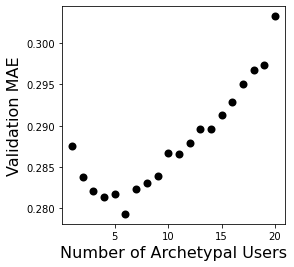

In [20]:
import matplotlib.pyplot as plt
x = range(1,21)
y = MusicRatingsValidationA_mae_lst
plt.figure(figsize=(4, 4))
plt.scatter(x, y, linewidth=2, color='black')
plt.xlabel('Number of Archetypal Users', fontsize=16)
plt.ylabel('Validation MAE', fontsize=16)
plt.show()

## Model Blending/Stacking

Collaborative Filtering

In [45]:
MusicRatings_soft_imputer = SoftImpute(max_rank=10, verbose=False) #use the best 
MusicRatings_centered_filled = MusicRatings_soft_imputer.fit_transform(MusicRatingsTrain_new_mat_centered)
MusicRatings_filled_matrix = MusicRatings_biscaler.inverse_transform(MusicRatings_centered_filled)
MusicRatings_filled_matrix = np.clip(MusicRatings_filled_matrix, 1, 5)

In [46]:
val_mae_cf = masked_mae(MusicRatingsValidationB_new_mat, MusicRatings_filled_matrix, MusicRatingsValidationB_new_mask)
print("MAE %s " % (val_mae_cf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_cf = masked_mse(MusicRatingsValidationB_new_mat, MusicRatings_filled_matrix, MusicRatingsValidationB_new_mask)
print("RMSE %s " % (np.sqrt(val_mse_cf)/4))

baseline_pred = np.mean(MusicRatingsTrain_new_df)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsValidationB_new_mat, baseline_model, MusicRatingsValidationB_new_mask)

print("OSR2 %s " % OSR2(val_mse_cf, baseline_mse))

MAE 0.07122520214651683 
RMSE 0.09830639858011402 
OSR2 0.2642871201937004 


In [47]:
val_pred_cf = MusicRatings_filled_matrix[MusicRatingsValidationB_new_mask]

blend_valB_df = MusicRatingsValidationB_new.reset_index()[['userID','songID','rating']]

blend_valB_df['val_pred_cf']=val_pred_cf
blend_valB_df

,userID,songID,rating,val_pred_cf
0,2318,400,1.000000,1.667737
1,2009,792,2.568853,1.244486
2,1280,584,1.000000,1.533314
3,146,534,1.000000,2.094931
4,1954,5,1.000000,1.448156
...,...,...,...,...
14465,1549,332,1.000000,1.046966
14466,979,667,1.000000,1.145793
14467,1737,594,1.000000,1.579576
14468,445,533,2.149164,1.209321


Linear Regression

In [48]:
# Some extra data preprocessing, converting numbers to categorical variables
MusicRatingsTrain_new['year'] = MusicRatingsTrain_new.year.astype('category')
# MusicRatingsTrain['AgeRange'] = MusicRatingsTrain.AgeRange.astype('category')
MusicRatingsValidationA_new['year'] = MusicRatingsValidationA_new.year.astype('category')
# MusicRatingsValidationA['AgeRange'] = MusicRatingsValidationA.AgeRange.astype('category')
MusicRatingsTest_new['year'] = MusicRatingsTest_new.year.astype('category')
# MusicRatingsTest['AgeRange'] = MusicRatingsTest.AgeRange.astype('category')
MusicRatingsTest_new

<ipython-input-48-78da47695a50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MusicRatingsTrain_new['year'] = MusicRatingsTrain_new.year.astype('category')
<ipython-input-48-78da47695a50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MusicRatingsValidationA_new['year'] = MusicRatingsValidationA_new.year.astype('category')
<ipython-input-48-78da47695a50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,songID,rating,year,songName_& Down,songName_'Round Midnight,songName_(I Got That) Boom Boom,songName_(You Drive Me) Crazy (The Stop Remix!),songName_1.36,songName_15 Step,songName_16 Candles,...,artist_Usher,artist_Vampire Weekend,artist_the bird and the bee,genre_Country,genre_Electronic,genre_Folk,genre_Pop,genre_Rap,genre_RnB,genre_Rock
userID,,,,,,,,,,,,,,,,,,,,,
1911,473,1.000000,2002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1544,448,1.784426,1999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19,34,1.000000,2002,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
490,231,1.000000,2007,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2356,134,1.000000,2005,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,773,1.494918,2007,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2218,424,1.494918,2006,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
782,91,1.000000,2002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [74]:
depedent_var = MusicRatingsTrain.columns.difference(["rating","userID","songID"])
print(len(depedent_var))
depedent_var = "+".join(depedent_var)
depedent_var

4


'artist+genre+songName+year'

In [75]:
import statsmodels.formula.api as smf
my_formula = "rating ~" + depedent_var
MusicRatings_ols = smf.ols(formula=my_formula, data=MusicRatingsTrain)
res = MusicRatings_ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     58.18
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:05:37   Log-Likelihood:            -1.3698e+05
No. Observations:              245997   AIC:                         2.756e+05
Df Residuals:                  245190   BIC:                         2.840e+05
Df Model:                         806                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [62]:
MusicRatingsValidationB.reset_index(drop=True, inplace=True)
val_pred_ols = res.predict(MusicRatingsValidationB_new)
blend_valB_df['val_pred_ols']=val_pred_ols
blend_valB_df

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'artist' is not defined
    rating ~artist+genre+songName+year
            ^^^^^^

In [59]:
# MusicRatingsValidationB_new_mat = MusicRatingsValidationB_new.to_numpy()
# MusicRatingsValidationB_new_mask = ~np.isnan(MusicRatingsValidationB_new_mat)

In [61]:
val_mae_ols = np.mean(np.abs(MusicRatingsValidationB_new_mat[MusicRatingsValidationB_new_mask] - val_pred_ols))
print("MAE %s " % (val_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_ols = np.mean((MusicRatingsValidationB_new_mat[MusicRatingsValidationB_new_mask] - val_pred_ols)**2)
print("RMSE %s " % (np.sqrt(val_mse_ols)/4))

print("OSR2 %s " % OSR2(val_mse_ols, baseline_mse))

ValueError: operands could not be broadcast together with shapes (14021430,) (14471,) 

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# MusicRatingsTrain_rest_index = MusicRatingsTrain.reset_index()
X_train = MusicRatingsTrain_new.drop(columns = ["songID","rating"])
y_train = MusicRatingsTrain_new["rating"]
rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)

In [ ]:
# MusicRatingsValidationB.reset_index(drop=True, inplace=True)
# MusicRatingsValidationB_rest_index = MusicRatingsValidationB.reset_index()
# MusicRatingsValidationB = pd.get_dummies(MusicRatingsValidationB)
val_pred_rf=rf.predict(MusicRatingsValidationB_new.drop(columns = ["songID","rating"]))

blend_valB_df['val_pred_rf']=val_pred_rf
blend_valB_df

In [ ]:
val_mae_rf = np.mean(np.abs(MusicRatingsValidationB_new_mat[MusicRatingsValidationB_new_mask] - val_pred_rf))
print("MAE %s " % (val_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_rf = np.mean((MusicRatingsValidationB_new_mat[MusicRatingsValidationB_new_mask] - val_pred_rf)**2)
print("RMSE %s " % (np.sqrt(val_mse_rf)/4))

print("OSR2 %s " % OSR2(val_mse_rf, baseline_mse))

Combine three models using OLS

In [ ]:
blending_ols = smf.ols(formula='rating ~ val_pred_cf+val_pred_ols+val_pred_rf -1', data=blend_valB_df)
blending_res = blending_ols.fit()
print(blending_res.summary())

In [ ]:
val_pred_blended =blending_res.predict(blend_valB_df)
blend_valB_df['pred_blended']= val_pred_blended

blend_valB_df

In [ ]:
val_mae_blended = np.mean(np.abs(MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_blended))
print("MAE %s " % (val_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_blended = np.mean((MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_blended)**2)
print("RMSE %s " % (np.sqrt(val_mse_blended)/4))

print("OSR2 %s " % OSR2(val_mse_blended, baseline_mse))

Test set performance

In [ ]:
baseline_pred = np.mean(MusicRatingsTrain_df)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsTest_mat, baseline_model, MusicRatingsTest_mask)
baseline_mse

In [ ]:
test_mae_cf = masked_mae(MusicRatingsTest_mat, MusicRatings_filled_matrix, MusicRatingsTest_mask)
print("Test_cf MAE  %s " % (val_mae_cf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_cf = masked_mse(MusicRatingsTest_mat, MusicRatings_filled_matrix, MusicRatingsTest_mask)
print("Test_cf RMSE %s " % (np.sqrt(val_mse_cf)/4))

baseline_pred = np.mean(MusicRatingsTrain_df)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsTest_mat, baseline_model, MusicRatingsTest_mask)

print("Test_cf OSR2 %s " % OSR2(val_mse_cf, baseline_mse))

In [ ]:
test_pred_cf = MusicRatings_filled_matrix[MusicRatingsTest_mask]

blend_test_df = MusicRatingsTest.reset_index()[['userID','songID','rating']]

blend_test_df['test_pred_cf']=test_pred_cf
blend_test_df

In [ ]:
MusicRatingsTest.reset_index(drop=True, inplace=True)
test_pred_ols = res.predict(MusicRatingsTest)
blend_test_df['test_pred_ols']=test_pred_ols
blend_test_df

In [ ]:
test_mae_ols = np.mean(np.abs(MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_ols))
print("Test_ols MAE  %s " % (test_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_ols = np.mean((MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_ols)**2)
print("Test_ols RMSE %s " % (np.sqrt(test_mse_ols)/4))

print("Test_ols OSR2 %s " % OSR2(test_mse_ols, baseline_mse))

In [ ]:
dtm = pd.concat([MusicRatingsTrain, MusicRatingsTest], join = 'inner')
MusicRatingsTrain_new = dtm.iloc[0:MusicRatingsTrain.shape[0]]
MusicRatingsTest_new = dtm.iloc[MusicRatingsTest.shape[0]:]

In [ ]:
MusicRatingsTest_new.reset_index(drop=True, inplace=True)
test_pred_rf=rf.predict(MusicRatingsTest_new.drop(columns = ["songID","rating"]))

blend_test_df['test_pred_rf']=test_pred_rf
blend_test_df

In [ ]:
test_mae_rf = np.mean(np.abs(MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_rf))
print("Test_rf MAE  %s " % (test_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_rf = np.mean((MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_rf)**2)
print("Test_rf RMSE %s " % (np.sqrt(test_mse_rf)/4))

print("Test_rf OSR2 %s " % OSR2(test_mse_rf, baseline_mse))

In [ ]:
blend_test_temp = blend_test_df.rename(columns={"test_pred_cf":"val_pred_cf","test_pred_ols":"val_pred_ols","test_pred_rf":"val_pred_rf" })
test_pred_blended =blending_res.predict(blend_test_temp)
blend_test_df['pred_blended']= test_pred_blended
blend_test_df

In [ ]:
test_mae_blended = np.mean(np.abs(MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_blended))
print("Test_blended MAE  %s " % (test_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_blended = np.mean((MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_blended)**2)
print("Test_blended RMSE %s " % (np.sqrt(test_mse_blended)/4))

print("Test_blended OSR2 %s " % OSR2(test_mse_blended, baseline_mse))